<a href="https://colab.research.google.com/github/RoyZhaoGA/DroughtForecastAI/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_csv("/content/drive/MyDrive/DroughtCastAI/Dataset/Processed_Datasets/CMIP6_processed_dataset_200km_version2_1_month_lag.csv")
dataset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am,next_month_spei01
0,287,201505,15.271,-17.068,297.249,291.684,304.108,292.141,0.000248,0.000000e+00,...,1132.95,303.650,3.938450e-06,-1.030740,-0.937773,2015-05-01,2015,5,0.148753,-1.983540
1,287,201506,15.271,-17.068,298.479,292.966,307.924,293.551,0.000030,0.000000e+00,...,1116.97,302.250,3.481040e-06,-1.983540,-1.747770,2015-06-01,2015,6,0.169415,-0.773948
2,287,201507,15.271,-17.068,300.038,296.358,304.813,295.583,0.039828,0.000000e+00,...,1368.95,302.435,1.429650e-05,-0.773948,-1.519480,2015-07-01,2015,7,0.229645,1.125420
3,287,201508,15.271,-17.068,300.277,297.167,304.959,297.178,0.201599,8.638150e-08,...,2475.59,303.790,6.708030e-05,1.125420,0.176900,2015-08-01,2015,8,0.226260,0.593335
4,287,201509,15.271,-17.068,300.453,296.962,304.370,297.498,0.118411,8.523460e-07,...,2849.36,304.714,1.539020e-06,0.593335,0.588032,2015-09-01,2015,9,0.155879,0.325884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83575,387,202304,11.678,51.204,299.834,294.269,306.253,293.895,0.005088,1.009060e-07,...,1300.87,303.895,1.717400e-06,1.432950,0.334410,2023-04-01,2023,4,0.147807,0.317675
83576,387,202305,11.678,51.204,301.408,294.354,307.231,295.266,0.019854,3.091570e-07,...,1210.34,305.717,4.468630e-07,0.317675,0.610513,2023-05-01,2023,5,0.147549,0.585810
83577,387,202306,11.678,51.204,302.933,296.843,309.328,292.453,0.000158,0.000000e+00,...,1144.27,305.315,3.380950e-08,0.585810,0.947582,2023-06-01,2023,6,0.146490,1.418990
83578,387,202307,11.678,51.204,304.032,299.200,309.950,290.167,0.000038,0.000000e+00,...,1043.21,303.643,4.085260e-06,1.418990,0.833237,2023-07-01,2023,7,0.148758,0.518092


In [ ]:
dataset.describe()

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,year,month2,next_month_soil_moisture_am,next_month_spei01
count,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,...,83580.000000,83580.000000,83580.000000,8.358000e+04,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000,83580.000000
mean,418.813735,201906.427614,6.426204,18.674333,297.649914,288.751947,307.368306,283.618993,0.053403,0.000054,...,3420.290769,2134.155208,298.576399,2.584283e-05,-0.646818,-0.761360,2018.999282,6.499402,0.151643,-0.646973
std,242.096341,242.792918,17.759911,15.790527,5.733555,6.671234,5.693900,8.848290,0.088575,0.000232,...,2345.066013,1406.945576,5.686335,4.198437e-05,1.343397,1.285446,2.432968,3.389895,0.126393,1.344868
min,0.000000,201505.000000,-33.238000,-17.068000,272.097000,258.898000,281.999000,259.118000,0.000016,0.000000,...,489.180000,326.296000,277.836000,0.000000e+00,-5.000000,-5.000000,2015.000000,1.000000,0.020000,-5.000000
25%,208.000000,201705.000000,-6.288000,8.085000,294.404000,284.604000,303.519750,276.173000,0.000221,0.000000,...,1138.105000,857.004500,295.590000,5.410485e-08,-1.500755,-1.608122,2017.000000,4.000000,0.050233,-1.499347
50%,419.000000,201906.000000,9.881000,20.661000,298.138000,290.355000,307.035500,284.262000,0.006267,0.000000,...,2827.910000,1692.095000,299.064000,3.700365e-06,-0.672251,-0.850191,2019.000000,6.000000,0.107151,-0.671430
75%,628.000000,202107.000000,20.661000,29.644000,301.243000,293.962000,311.563000,291.767250,0.076323,0.000001,...,5490.260000,3268.610000,302.221000,3.568545e-05,0.246571,0.077590,2021.000000,9.000000,0.219935,0.247549
max,837.000000,202308.000000,36.831000,51.204000,313.569000,302.760000,322.431000,298.408000,1.148110,0.006530,...,8742.230000,6458.600000,313.910000,3.350020e-04,5.000000,5.000000,2023.000000,12.000000,0.668410,5.000000


In [ ]:
dataset.sum()

Unnamed: 0                                                                  35004452
Month                                                                    16875339220
Lat                                                                       537102.133
Lon                                                                      1560800.722
temperature_2m                                                          24877579.783
temperature_2m_min                                                      24133887.715
temperature_2m_max                                                      25689843.054
dewpoint_temperature_2m                                                 23704875.408
total_precipitation_sum                                                  4463.421947
total_precipitation_min                                                     4.536282
total_precipitation_max                                                   822.933829
u_component_of_wind_10m                                          

In [ ]:
dataset.isna().sum()

Unnamed: 0                         0
Month                              0
Lat                                0
Lon                                0
temperature_2m                     0
temperature_2m_min                 0
temperature_2m_max                 0
dewpoint_temperature_2m            0
total_precipitation_sum            0
total_precipitation_min            0
total_precipitation_max            0
u_component_of_wind_10m            0
v_component_of_wind_10m            0
surface_net_solar_radiation_sum    0
total_evaporation_sum              0
soil_moisture_am                   0
soil_moisture_pm                   0
NDVI                               0
EVI                                0
next_month_tempreature             0
next_month_precipitation           0
spei01                             0
spei03                             0
datetime                           0
year                               0
month2                             0
next_month_soil_moisture_am        0
n

In [ ]:
len(dataset)

83580

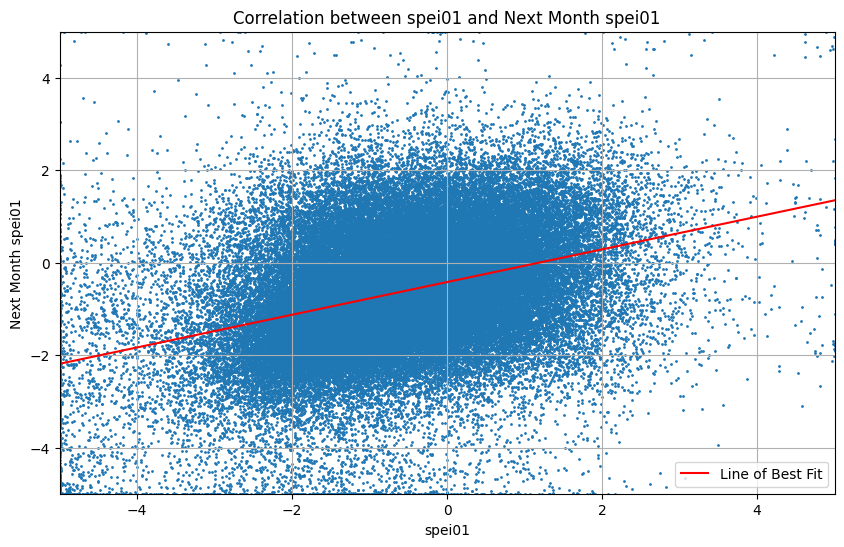

Correlation coefficient: 0.35338392328438434


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named dataset with columns "spei01" and "next_month_spei01"

# Plotting the correlation
plt.figure(figsize=(10, 6))
plt.scatter(dataset["spei01"], dataset["next_month_spei01"], s=1)
plt.title("Correlation between spei01 and Next Month spei01")
plt.xlabel("spei01")
plt.ylabel("Next Month spei01")
plt.grid(True)

spei01_range = dataset["spei01"].max() - dataset["spei01"].min()
next_month_spei01_range = dataset["next_month_spei01"].max() - dataset["next_month_spei01"].min()

plt.xlim(dataset["spei01"].min() - 0.1 * spei01_range + 1, dataset["spei01"].max() + 0.1 * spei01_range - 1)
plt.ylim(dataset["next_month_spei01"].min() - 0.1 * next_month_spei01_range + 1, dataset["next_month_spei01"].max() + 0.1 * next_month_spei01_range - 1)

# Adding a line of best fit
coefficients = np.polyfit(dataset["spei01"], dataset["next_month_spei01"], 1)
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(dataset["spei01"].min(), dataset["spei01"].max(), 100)
plt.plot(x_axis, polynomial(x_axis), color='red', label='Line of Best Fit')  # line of best fit

# Adding a legend to indicate the line of best fit
plt.legend()

plt.show()
# Calculating the correlation
correlation = dataset["spei01"].corr(dataset["next_month_spei01"])
print("Correlation coefficient:", correlation)

In [8]:
random_row = dataset.sample(n=1)

specific_lon = int(random_row["Lon"])
specific_lat = int(random_row["Lat"])

# Creating the subset
subset = dataset[(dataset["Lon"] == 36.831) & (dataset["Lat"] == -8.085)]

In [9]:
subset

,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,total_precipitation_min,...,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am,next_month_spei01
73191,642,201505,-8.085,36.831,295.696,289.719,300.931,291.859,0.108957,1.274730e-06,...,4279.45,296.083,6.552320e-06,0.069287,-0.686550,2015-05-01,2015,5,0.159638,-1.005330
73192,642,201506,-8.085,36.831,294.513,287.317,301.224,288.211,0.014878,0.000000e+00,...,3737.62,294.411,2.384580e-06,-1.005330,-0.685380,2015-06-01,2015,6,0.134587,-0.517985
73193,642,201507,-8.085,36.831,294.716,287.299,301.778,287.701,0.024312,7.622230e-07,...,2978.10,295.043,5.805900e-07,-0.517985,-0.362989,2015-07-01,2015,7,0.123465,-0.922291
73194,642,201508,-8.085,36.831,295.664,288.622,303.206,287.339,0.015016,1.278390e-06,...,2600.47,296.203,2.890230e-06,-0.922291,-1.220050,2015-08-01,2015,8,0.118243,-0.875232
73195,642,201509,-8.085,36.831,297.870,290.676,306.124,287.489,0.004741,0.000000e+00,...,2255.08,296.277,8.723770e-06,-0.875232,-1.071500,2015-09-01,2015,9,0.111872,-1.193010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73285,642,202304,-8.085,36.831,296.822,290.948,302.304,294.101,0.253453,6.015220e-05,...,4614.71,297.743,1.119660e-05,0.544009,0.299292,2023-04-01,2023,4,0.277264,-0.486147
73286,642,202305,-8.085,36.831,296.075,290.476,301.835,292.183,0.045775,1.061620e-06,...,4342.00,296.747,1.068140e-05,-0.486147,-0.061616,2023-05-01,2023,5,0.229759,0.419882
73287,642,202306,-8.085,36.831,295.247,287.573,301.975,289.038,0.023715,2.868990e-07,...,4203.96,295.213,1.554840e-06,0.419882,0.213119,2023-06-01,2023,6,0.155197,-1.199270
73288,642,202307,-8.085,36.831,295.161,287.877,302.975,286.922,0.013578,1.225220e-07,...,3497.51,296.407,1.788310e-06,-1.199270,-0.533952,2023-07-01,2023,7,0.159500,-1.010900


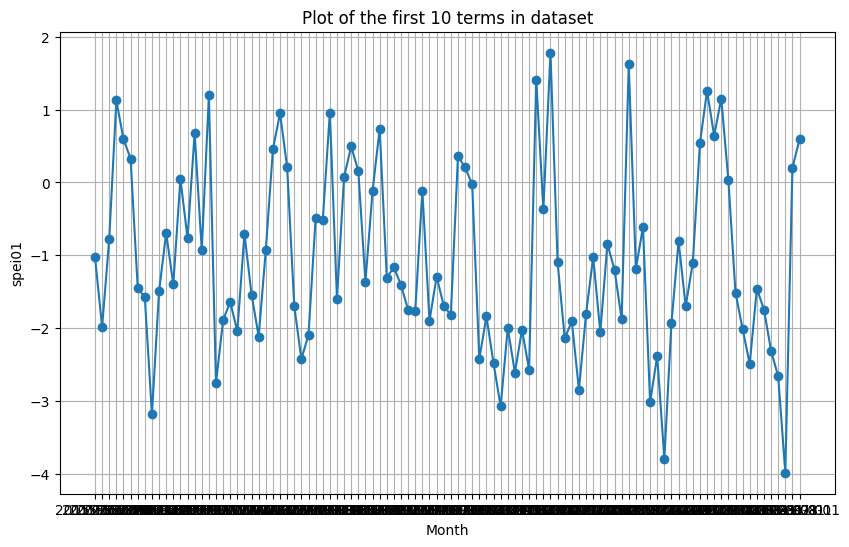

In [15]:
#SPEI graph of first 10 months
plt.figure(figsize=(10, 6))
plt.plot(dataset['datetime'].iloc[:100], dataset['spei01'].iloc[:100], marker='o')
plt.title('Plot of the first 10 terms in dataset')
plt.xlabel('Month')
plt.ylabel('spei01')
plt.grid(True)
plt.show()

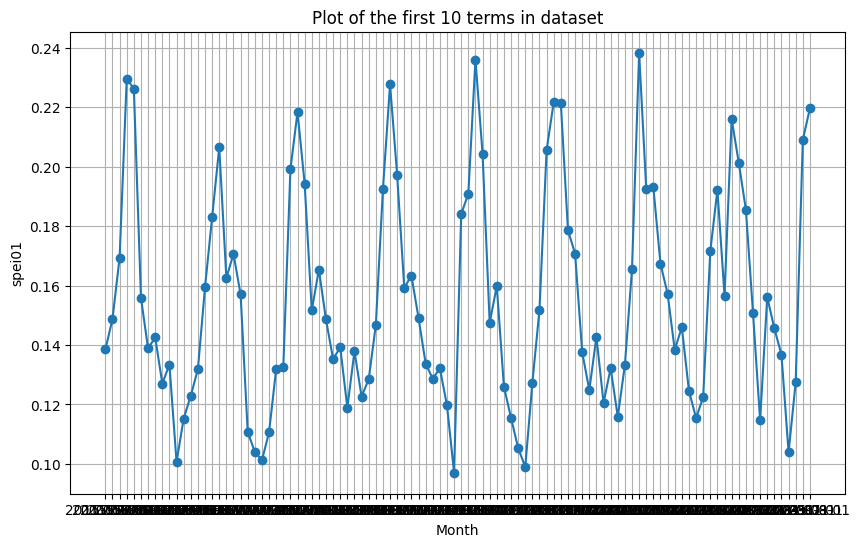

In [16]:
#Soil Moisture graph of first 10 months
plt.figure(figsize=(10, 6))
plt.plot(dataset['datetime'].iloc[:100], dataset['soil_moisture_am'].iloc[:100], marker='o')
plt.title('Plot of the first 10 terms in dataset')
plt.xlabel('Month')
plt.ylabel('spei01')
plt.grid(True)
plt.show()

In [25]:
dataset.columns

Index(['Unnamed: 0', 'Month', 'Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'datetime', 'year', 'month2', 'next_month_soil_moisture_am',
       'next_month_spei01'],
      dtype='object')

In [27]:
dataset['datetime'] = pd.to_datetime(dataset['datetime'])

dataset['monthly_datetime'] = dataset['datetime'].dt.to_period('M').dt.to_timestamp()

In [32]:
dataset['monthly_datetime']

0       2015-05-01
1       2015-06-01
2       2015-07-01
3       2015-08-01
4       2015-09-01
           ...    
83575   2023-04-01
83576   2023-05-01
83577   2023-06-01
83578   2023-07-01
83579   2023-08-01
Name: monthly_datetime, Length: 83580, dtype: datetime64[ns]

In [31]:
timeseries.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: soil_moisture_am, dtype: float64

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

timeseries = pd.Series(dataset['soil_moisture_am'].iloc[:100], index=pd.to_datetime(dataset['monthly_datetime'].iloc[:100]))

# Perform seasonal decomposition
result = seasonal_decompose(timeseries, model='additive', period=12)  # period depends on expected seasonality

# Plot the decomposition
result.plot()
plt.show()

ValueError: This function does not handle missing values

<ipython-input-9-d021248850a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = dataset.corr()


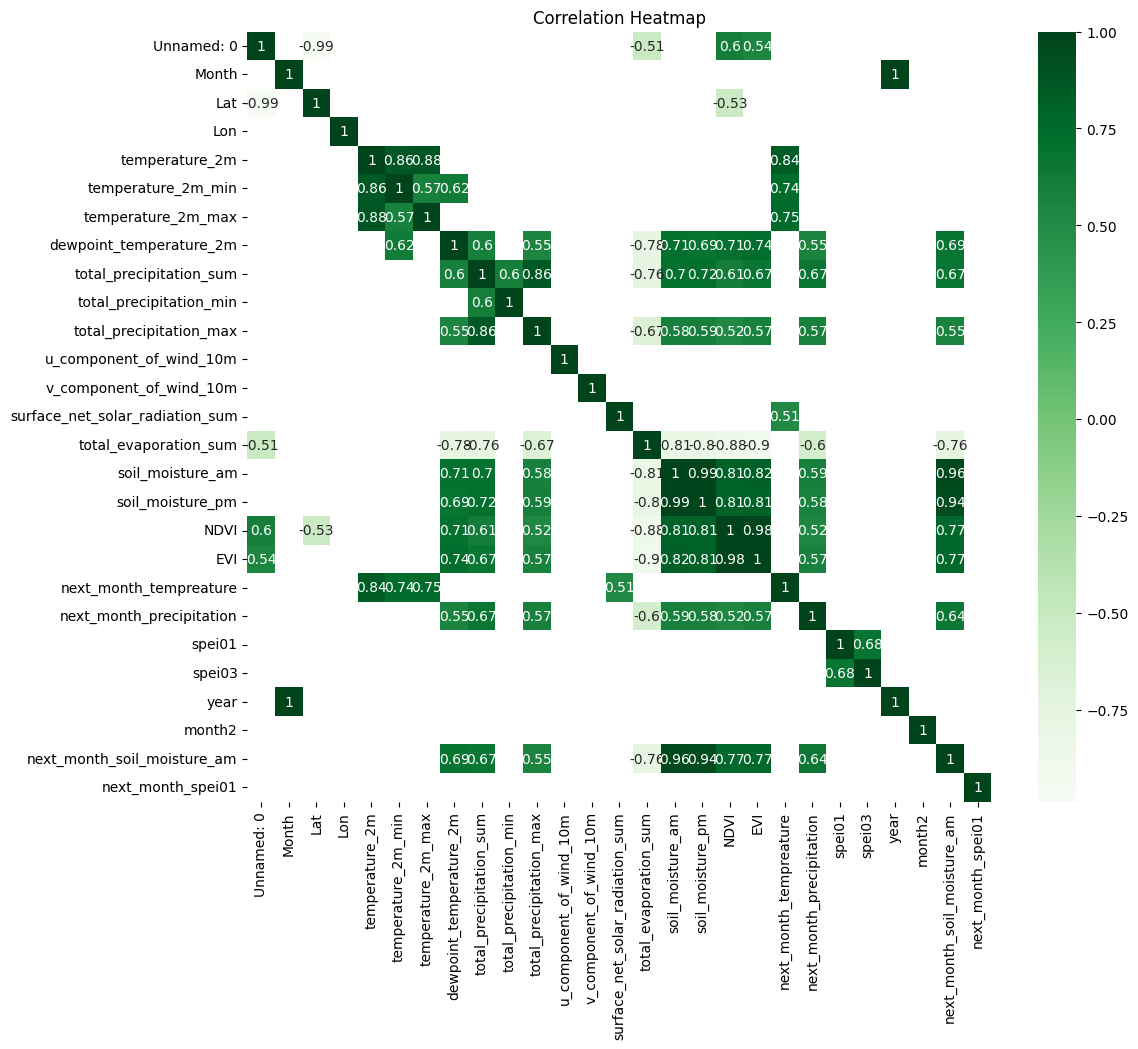

In [ ]:
correlation_matrix = dataset.corr()

filtered_correlations = correlation_matrix[(correlation_matrix <= -0.5) | (correlation_matrix >= 0.5)]

plt.figure(figsize=(12, 10))
sns.heatmap(filtered_correlations, annot=True, cmap='Greens', center=0)
plt.title("Correlation Heatmap")
plt.show()

- Longitude is moderately inversely correlated to NDVI
- Average temperature this month is strongly correlated to average temperature the following month
- Average temperature is strongly correlated to minimum and maximum temperature
- Dewpoint temperature is strongly correlated with NDVI, EVI, and soil moisture. It is moderately correlated with next month precipitation, past month precipitation, and past month temperature
- Total past month precipitation is strongly correlated with soil moisture, maximum precipitation, and dewpoint temperature
- NDVI and EVI are strongly correlated with soil moisture


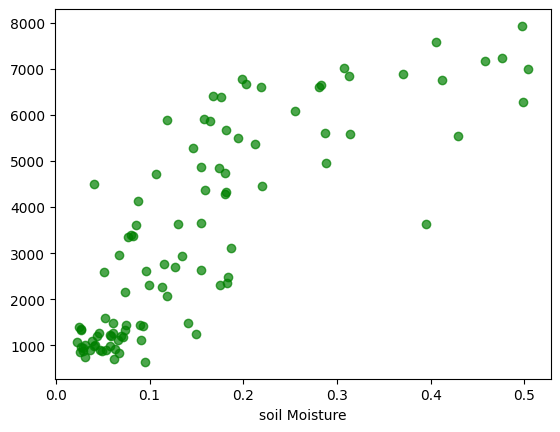

In [ ]:
import random

sample_df = dataset.sample(n=100, axis='rows')

soil_moisture = sample_df["soil_moisture_am"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(soil_moisture, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("soil Moisture")

plt.show()

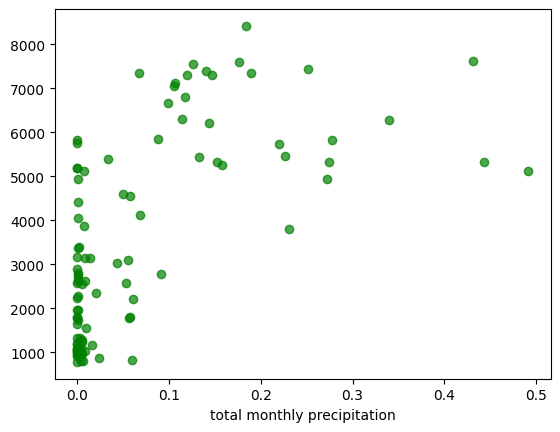

In [ ]:
sample_df = dataset.sample(n=100, axis='rows')

total_precipitation_sample = sample_df["total_precipitation_sum"]
NDVI_sample = sample_df["NDVI"]

plt.scatter(total_precipitation_sample, NDVI_sample, c="green", alpha=0.7)
plt.xlabel("total monthly precipitation")

plt.show()

<ipython-input-10-d8f96d5f0668>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


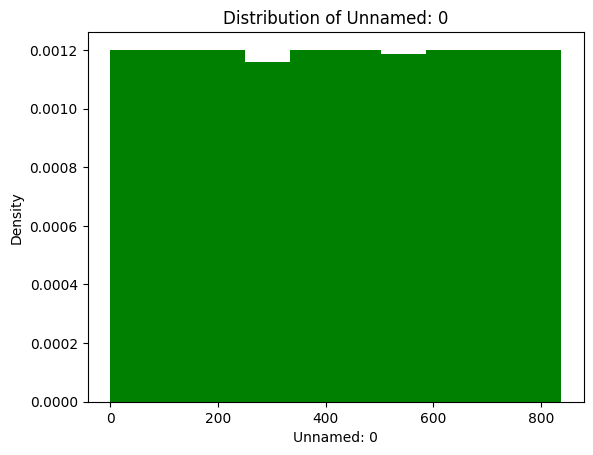

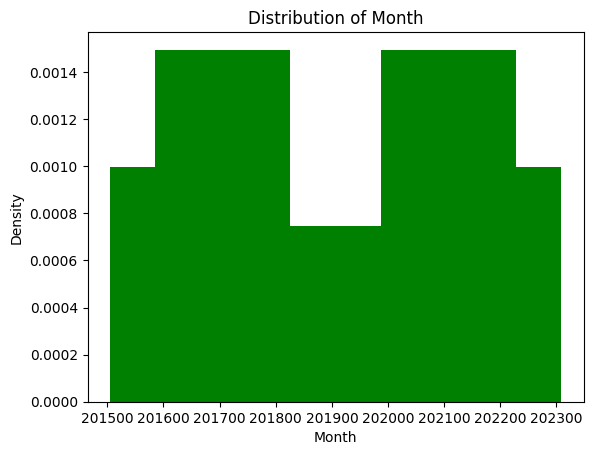

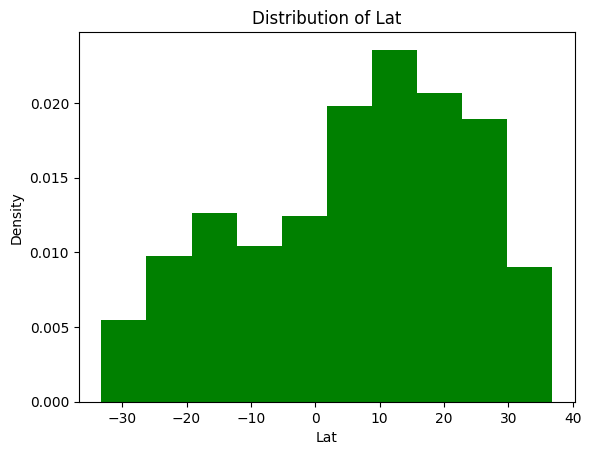

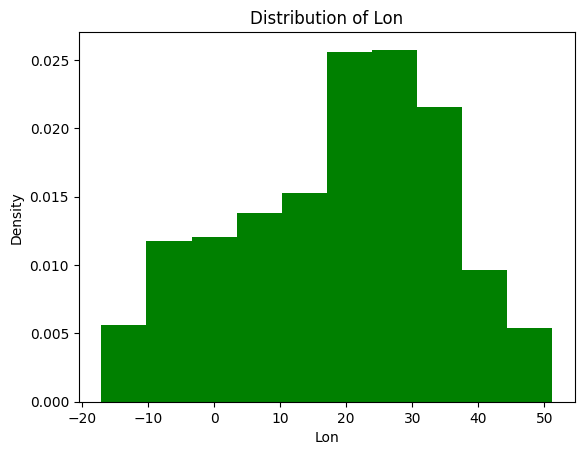

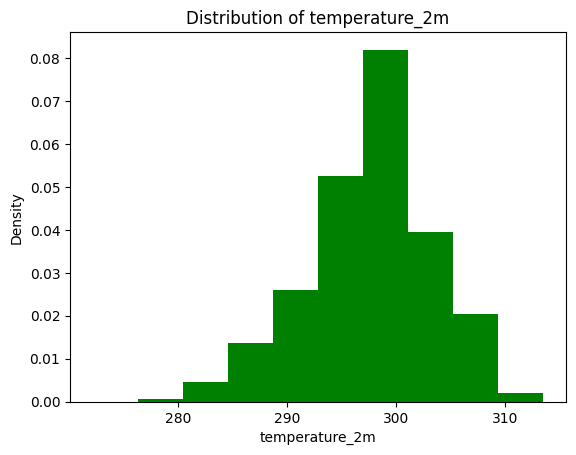

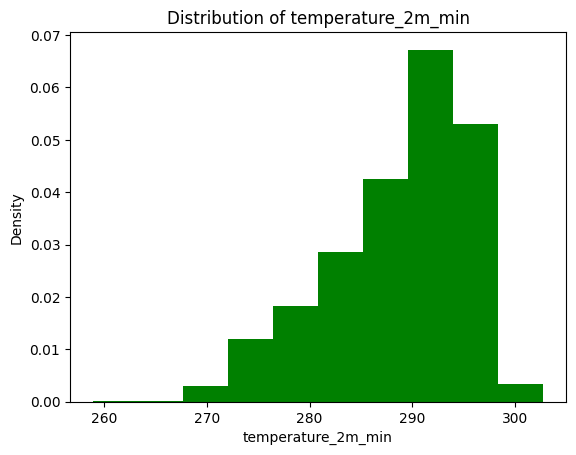

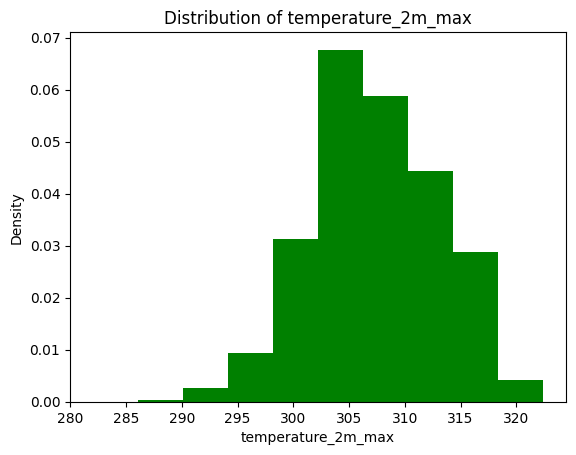

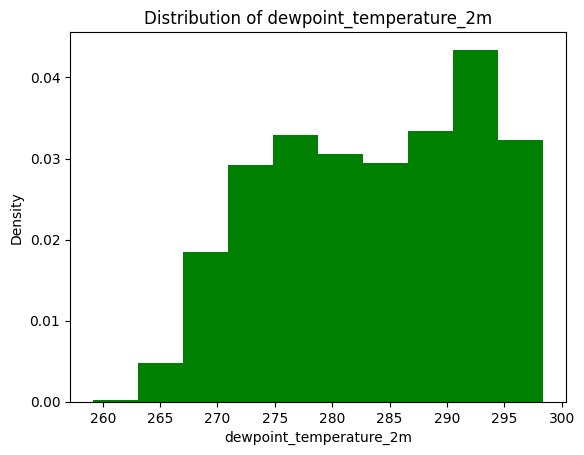

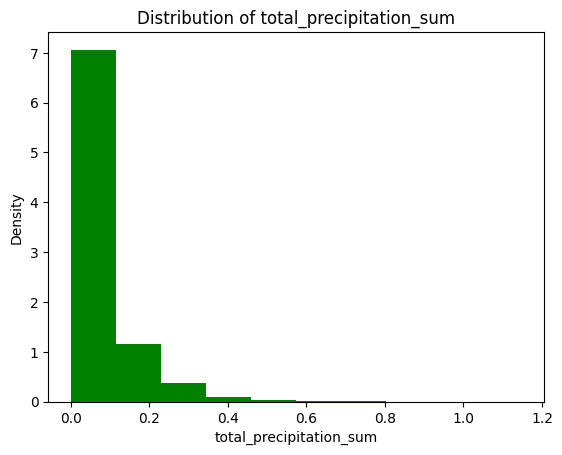

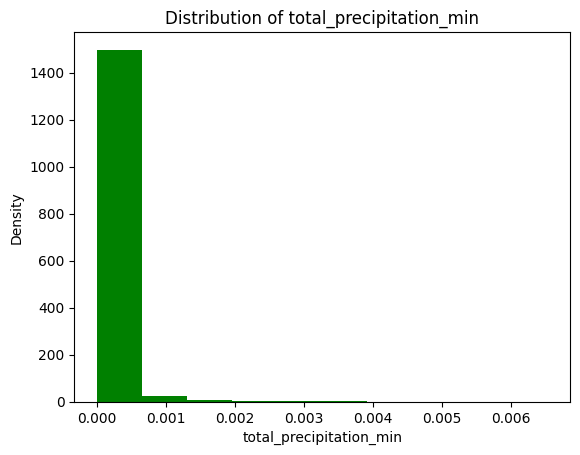

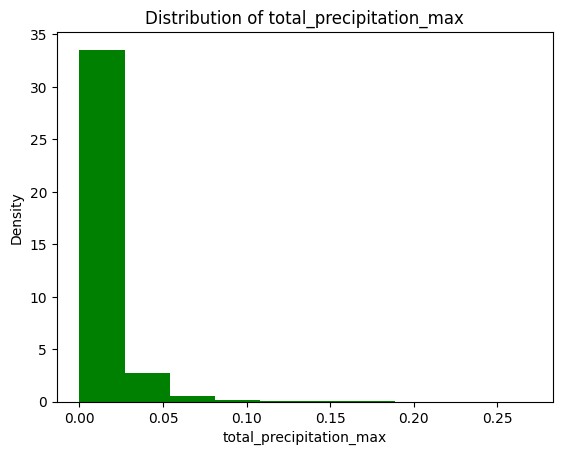

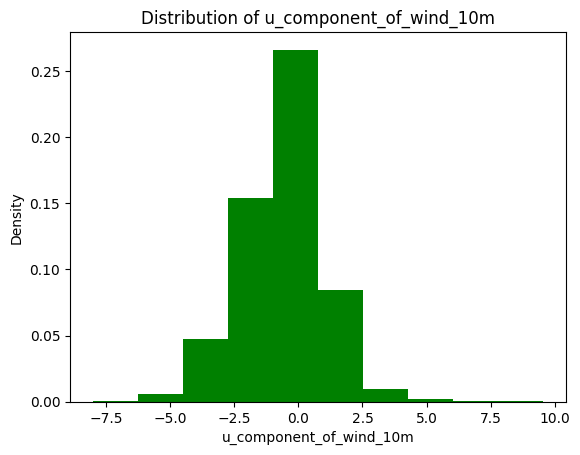

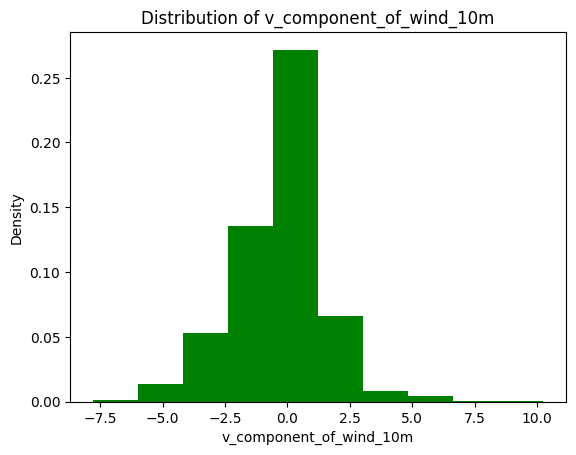

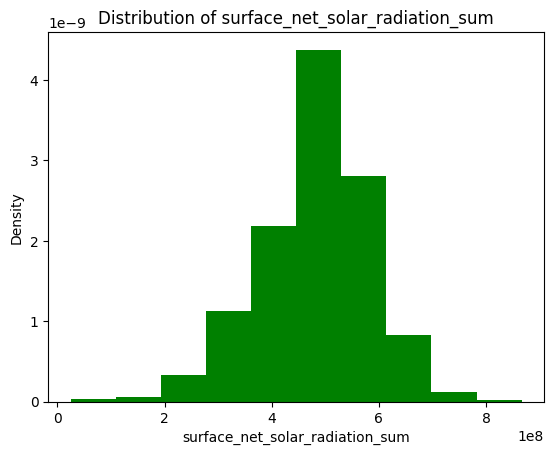

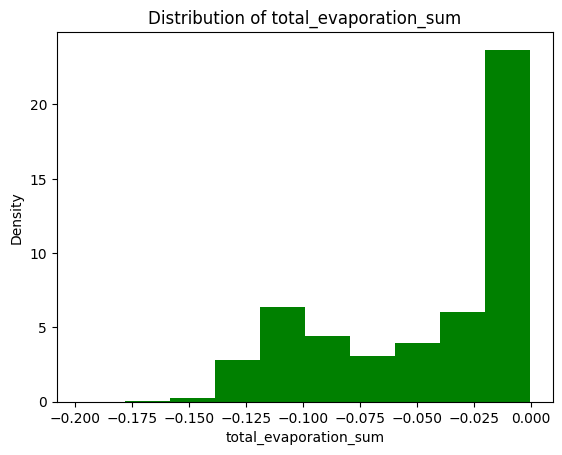

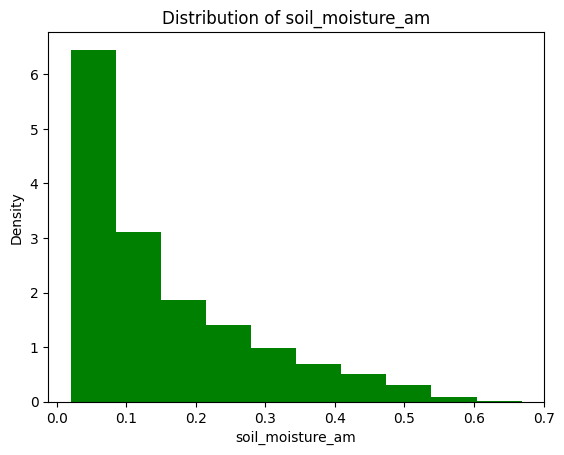

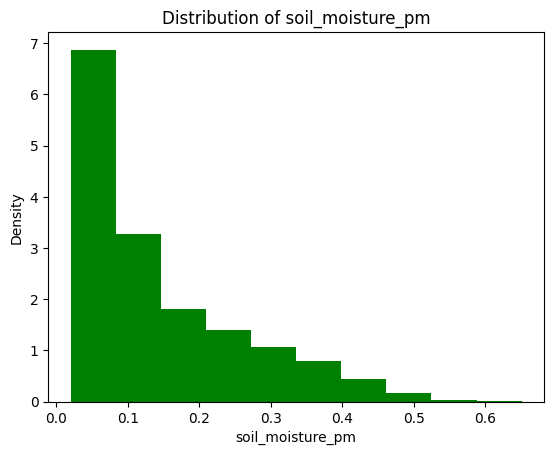

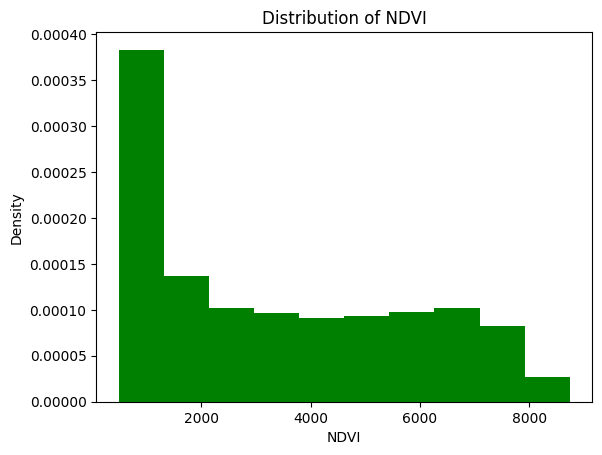

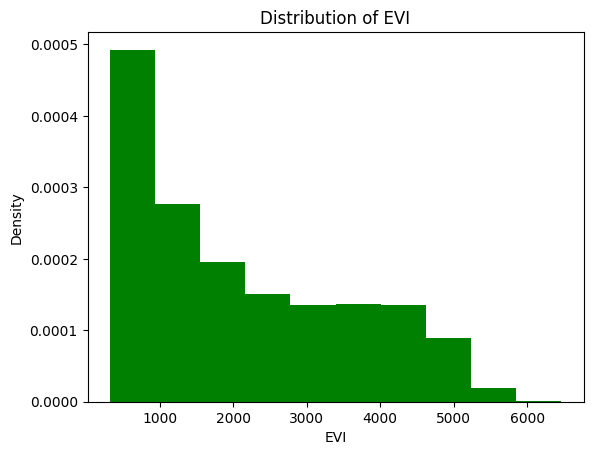

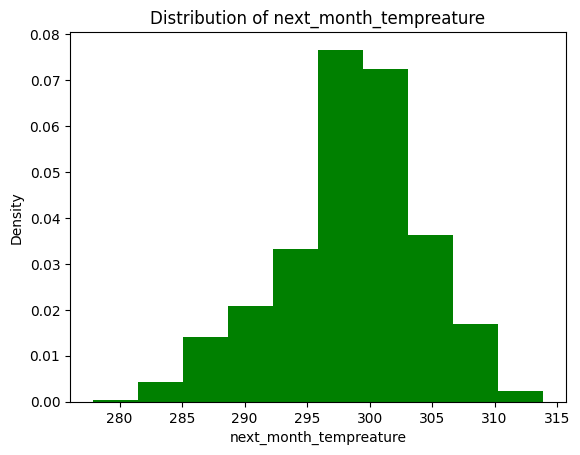

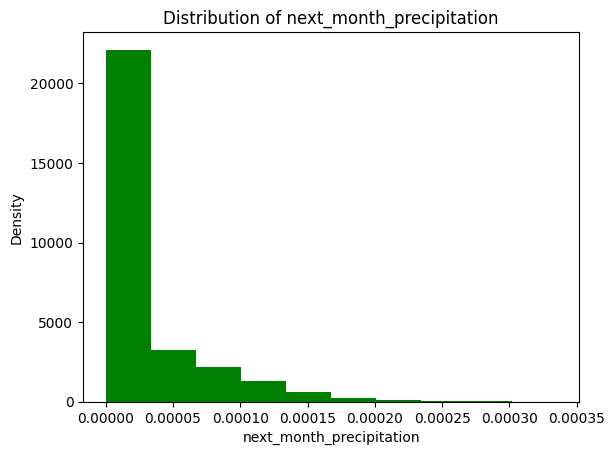

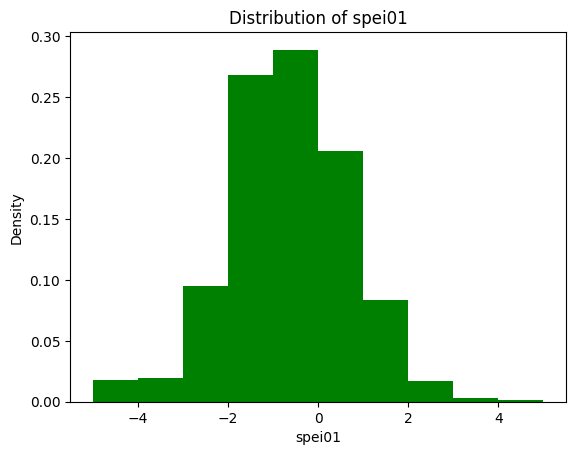

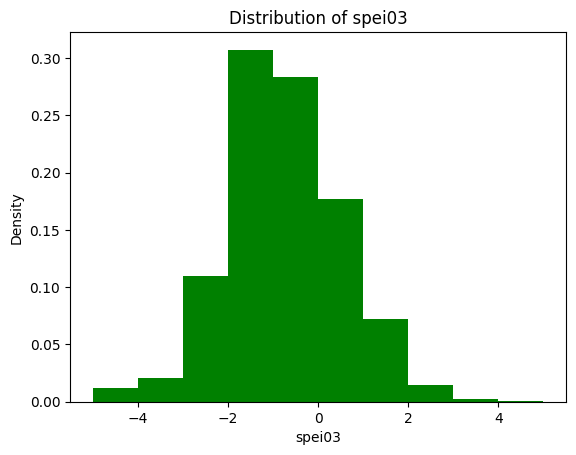

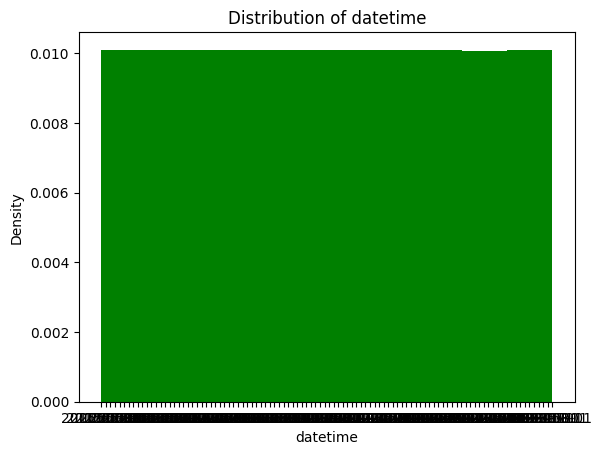

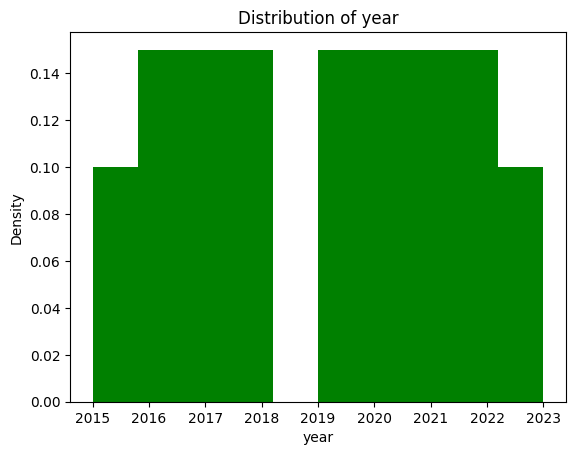

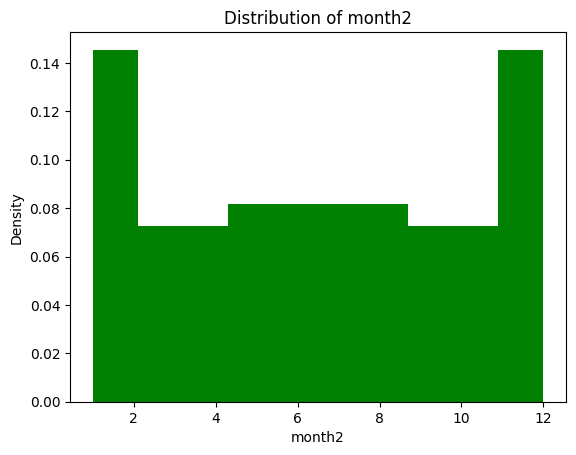

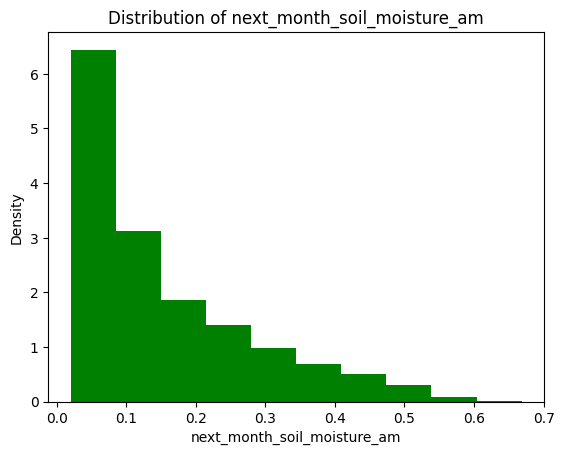

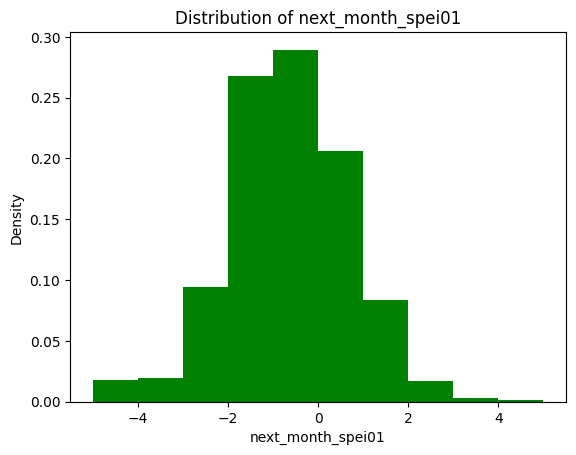

In [ ]:
column_list = dataset.columns.values.tolist()

for col_name in column_list:
    plt.figure()
    plt.hist(dataset[col_name], density = True, color = 'green')
    x_name = col_name
    plt.xlabel(x_name)
    y_name = 'Density'
    plt.ylabel(y_name)
    plt.title('Distribution of {x_name}'.format(x_name=x_name))

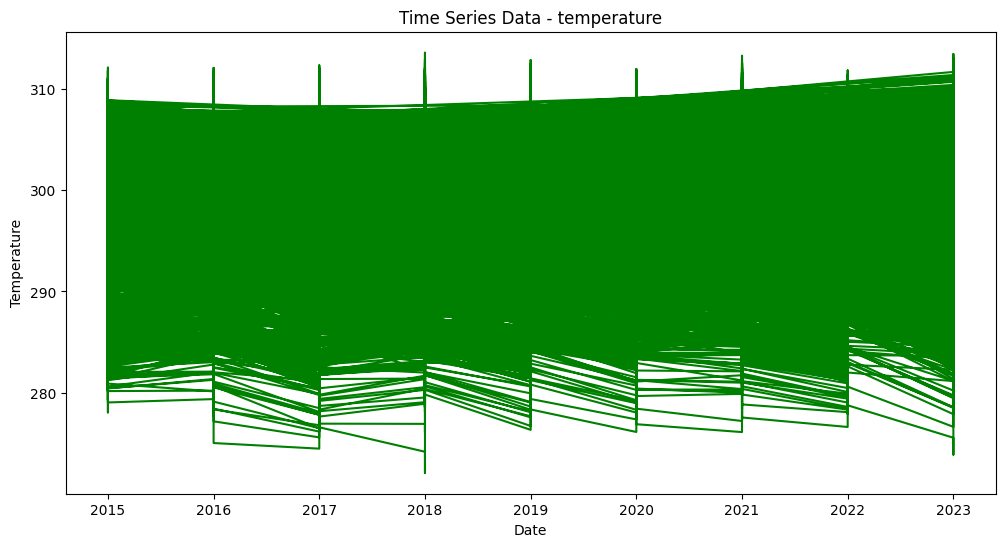

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['year'], dataset['temperature_2m'], color = 'green')
plt.title('Time Series Data - temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()
# how to agregate this for yearly sums?

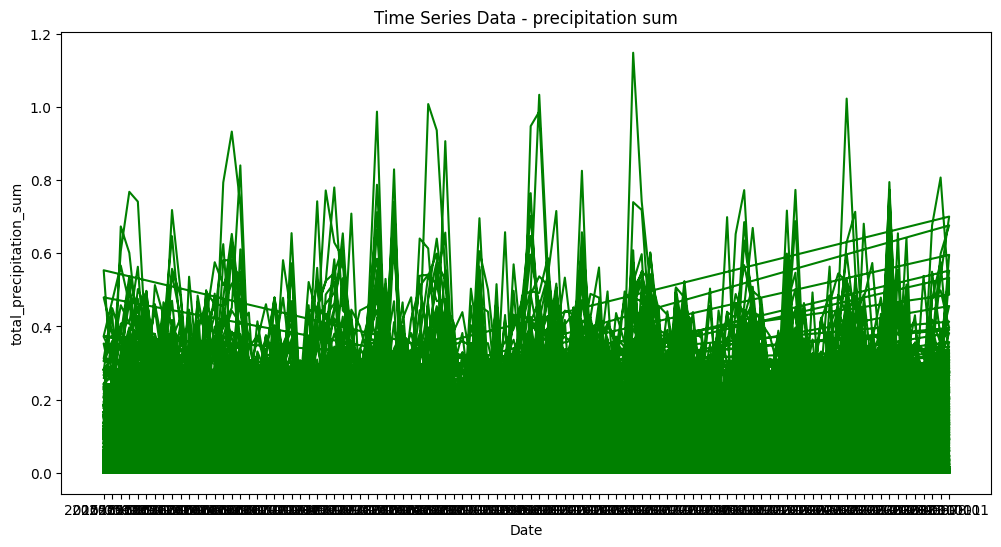

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['datetime'], dataset['total_precipitation_sum'], color = 'green')
plt.title('Time Series Data - precipitation sum')
plt.xlabel('Date')
plt.ylabel('total_precipitation_sum')
plt.show()

In [ ]:
dataset.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Month', 'Lat', 'Lon', 'temperature_2m',
       'temperature_2m_min', 'temperature_2m_max', 'dewpoint_temperature_2m',
       'total_precipitation_sum', 'total_precipitation_min',
       'total_precipitation_max', 'u_component_of_wind_10m',
       'v_component_of_wind_10m', 'surface_net_solar_radiation_sum',
       'total_evaporation_sum', 'soil_moisture_am', 'soil_moisture_pm', 'NDVI',
       'EVI', 'next_month_tempreature', 'next_month_precipitation', 'spei01',
       'spei03', 'datetime', 'year', 'month2', 'next_month_soil_moisture_am'],
      dtype='object')

In [ ]:
dataset["datetime"]

0        2015-05-01
1        2015-06-01
2        2015-07-01
3        2015-08-01
4        2015-09-01
            ...    
83575    2023-04-01
83576    2023-05-01
83577    2023-06-01
83578    2023-07-01
83579    2023-08-01
Name: datetime, Length: 83580, dtype: object

In [ ]:
test_dataset = dataset[dataset['datetime'] == "2015-05-01"].merge(dataset[dataset['datetime'] == "2015-06-01"])

In [ ]:
test_dataset

,Unnamed: 0.1,Unnamed: 0,Month,Lat,Lon,temperature_2m,temperature_2m_min,temperature_2m_max,dewpoint_temperature_2m,total_precipitation_sum,...,NDVI,EVI,next_month_tempreature,next_month_precipitation,spei01,spei03,datetime,year,month2,next_month_soil_moisture_am


In [ ]:
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))

# Formatting the date for better readability
plt.plot(test_dataset['datetime'], test_dataset['spei01'], color='green', linewidth=2)

# Improving title and labels
plt.title('Time Series of SPEI Over Years', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('SPEI 1 month', fontsize=12)

# Adding gridlines
plt.grid(True)

# Rotating date labels for better visibility
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

NameError: name 'test_dataset' is not defined

<Figure size 1200x600 with 0 Axes>

In [ ]:
# make a map of average SPEI in Africa, Max SPEI, min SPEI, or SPEI variability. Then, color code the categories of SPEI

In [ ]:
#make a map graph of SPEI at a particular datetime

In [ ]:
import seaborn as sns

In [ ]:
import plotly.express as px

new_dataframe = dataset[dataset['datetime'] == '2015-10-01']

fig = px.density_mapbox(new_dataframe, lat='Lat', lon='Lon', z='NDVI',
                        radius=20,
                        center=dict(lat=dataset['Lat'].mean(), lon=dataset['Lon'].mean()),
                        zoom=5,
                        mapbox_style='carto-positron')

fig.update_layout(title='Spatial Heatmap of SPEI01',
                  margin={"r":0,"t":0,"l":0,"b":0})

fig.show()